In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [2]:
# reading in combined ce5 and ce6 data
logs = pd.read_csv('../data/logs_clean.csv')

In [3]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9547413 entries, 0 to 9547412
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TIME          object 
 1   USER          int64  
 2   RETRY         int64  
 3   TIMELAPSE     float64
 4   RETURNCODE    int64  
 5   COMMAND       object 
 6   SERVER        object 
 7   UNRESPONSIVE  bool   
 8   TESTING       bool   
 9   DAY           object 
 10  WEEKDAY       object 
dtypes: bool(2), float64(1), int64(3), object(5)
memory usage: 673.8+ MB


In [8]:
# setting the datatype of the date columns
logs['TIME'] = logs['TIME'].astype('datetime64')
logs['DAY'] = logs['TIME'].dt.date.astype('datetime64')

In [ ]:
#logs['WEEKDAY'] = logs['DAY'].dt.day_name()

In [4]:
logs.head()

,TIME,USER,RETRY,TIMELAPSE,RETURNCODE,COMMAND,SERVER,UNRESPONSIVE,TESTING,DAY,WEEKDAY
0,2020-10-16 08:15:39.278699,0,0,0.073476,0,sacct,ce5,False,False,2020-10-16 00:00:00.000000,Friday
1,2020-10-16 08:18:08.313309,0,0,0.183632,0,sacct,ce5,False,False,2020-10-16 00:00:00.000000,Friday
2,2020-10-16 08:22:48.128689,0,0,0.075471,0,sacct,ce5,False,False,2020-10-16 00:00:00.000000,Friday
3,2020-10-16 08:25:13.257408,0,0,0.094844,0,sacct,ce5,False,False,2020-10-16 00:00:00.000000,Friday
4,2020-10-16 08:31:01.460723,0,0,0.074988,0,sacct,ce5,False,False,2020-10-16 00:00:00.000000,Friday


In [10]:
# making a dataframe of the logs that are unresponsive
unresponsive = logs[logs['UNRESPONSIVE'] == True]

In [11]:
# making it so pandas recognizes the weekday column as categorical
unresponsive['WEEKDAY'] = pd.Categorical(unresponsive['WEEKDAY'], ['Monday',
                                                                   'Tuesday',
                                                                   'Wednesday',
                                                                   'Thursday',
                                                                   'Friday', 
                                                                   'Saturday',
                                                                   'Sunday'])

C:\Users\sarei\AppData\Local\Temp/ipykernel_13608/3466814704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unresponsive['WEEKDAY'] = pd.Categorical(unresponsive['WEEKDAY'], ['Monday',


In [ ]:
#  logs.to_csv('../data/logs_clean.csv',
#             index = False)

In [ ]:
#  unresponsive.to_csv('../data/unresponsive.csv',
#                     index = False)

In [12]:
# finding the number of times a day the servers become unresponsive
unresponsive['ROLL1D'] = (unresponsive
                               .rolling('1d', on = 'DAY')['USER']
                               .count())

unresponsive.head()

C:\Users\sarei\AppData\Local\Temp/ipykernel_13608/1085098614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unresponsive['ROLL1D'] = (unresponsive


,TIME,USER,RETRY,TIMELAPSE,RETURNCODE,COMMAND,SERVER,UNRESPONSIVE,TESTING,DAY,WEEKDAY,ROLL1D
4396,2020-10-16 11:43:45.753267,9201,0,20.150959,1,sbatch,ce5,True,False,2020-10-16,Friday,1.0
4397,2020-10-16 11:43:45.920205,9201,0,20.218138,1,sbatch,ce5,True,False,2020-10-16,Friday,2.0
4398,2020-10-16 11:43:45.939591,9201,0,20.188296,1,sbatch,ce5,True,False,2020-10-16,Friday,3.0
4399,2020-10-16 11:43:46.119672,9201,0,20.114305,1,sbatch,ce5,True,False,2020-10-16,Friday,4.0
4400,2020-10-16 11:43:46.380161,9202,0,20.092560,1,sbatch,ce5,True,False,2020-10-16,Friday,5.0


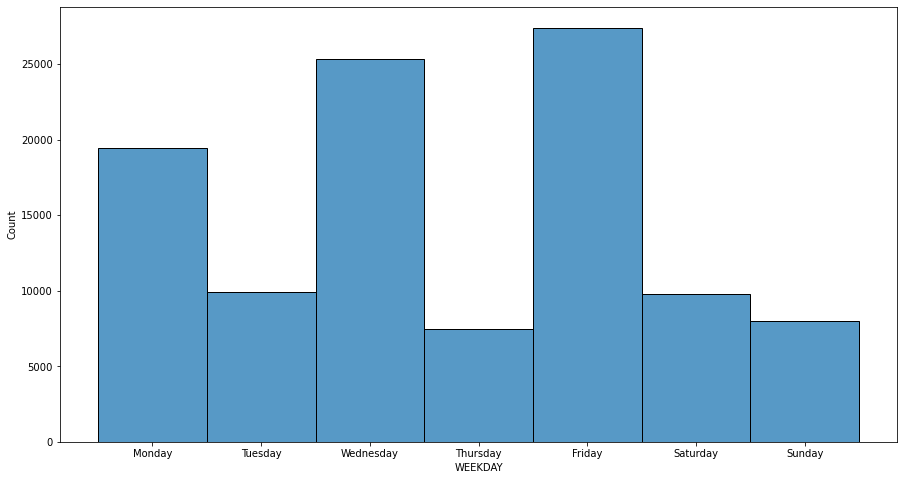

In [13]:
# number times servers are unresponsive by day of the week (user 9204 not included)
plt.figure(figsize = (15,8))

sns.histplot(data = unresponsive,
           x = 'WEEKDAY');

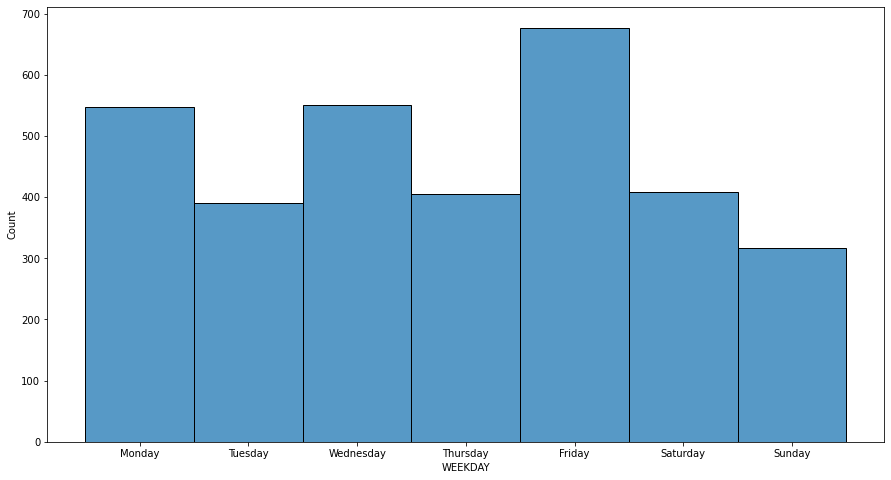

In [14]:
# number times servers are unresponsive by day of the week (user 9204 included)
plt.figure(figsize = (15,8))

sns.histplot(data = unresponsive[unresponsive['TESTING'] == True],
            x = 'WEEKDAY');

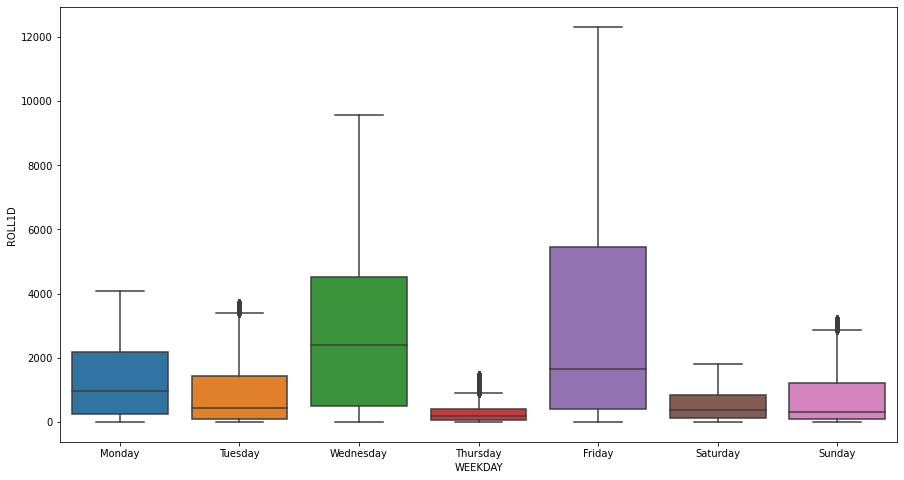

In [15]:
# box polts of times servers are unresponsive by day of the week (user 9204 not included)
plt.figure(figsize = (15,8))

sns.boxplot(data = unresponsive,
           x = 'WEEKDAY',
           y = 'ROLL1D');

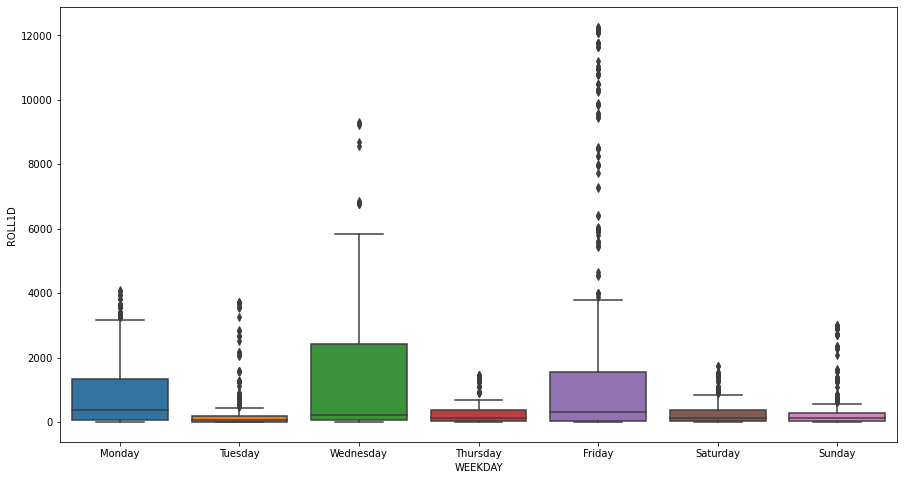

In [16]:
# box plots of times servers are unresponsive by day of the week (user 9204 included)
plt.figure(figsize = (15,8))

sns.boxplot(data = unresponsive[unresponsive['TESTING'] == True],
           x = 'WEEKDAY',
           y = 'ROLL1D');

In [17]:
# reading in jobs data
jobs = pd.read_csv('../data/jobs-corrected_clean.csv',
                  parse_dates = ['BEGIN', 'END'])

C:\Users\sarei\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
# recalculating joblength to set data type to timedelta
jobs['JOBLENGTH'] = jobs['END'] - jobs['BEGIN']

In [19]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395885 entries, 0 to 7395884
Data columns (total 15 columns):
 #   Column      Dtype          
---  ------      -----          
 0   JOBID       object         
 1   STATE       object         
 2   BEGIN       datetime64[ns] 
 3   END         datetime64[ns] 
 4   REQMEM      int64          
 5   USEDMEM     object         
 6   REQTIME     object         
 7   USEDTIME    object         
 8   NODES       int64          
 9   CPUS        int64          
 10  PARTITION   object         
 11  EXITCODE    object         
 12  JOBLENGTH   timedelta64[ns]
 13  MEMPERUNIT  object         
 14  REQMEMTOT   object         
dtypes: datetime64[ns](2), int64(3), object(9), timedelta64[ns](1)
memory usage: 846.4+ MB


In [20]:
jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,MEMPERUNIT,REQMEMTOT
0,30616928,RUNNING,2021-07-31 22:15:00,NaT,2048,0,10:04:00,67-22:14:22,1,1,production,0:0,NaT,Mn,2048
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0,30 days 00:00:23,Mn,262144
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0,30 days 00:00:14,Mn,204800
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0,29 days 04:00:04,Mn,65536
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0,24 days 09:00:17,Mn,16384


In [21]:
# adding day of the week for the job start
jobs['BEGINWEEKDAY'] = jobs['BEGIN'].dt.day_name()

In [22]:
# adding day of the week for the job end
jobs['ENDWEEKDAY'] = jobs['END'].dt.day_name()

In [23]:
jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,MEMPERUNIT,REQMEMTOT,BEGINWEEKDAY,ENDWEEKDAY
0,30616928,RUNNING,2021-07-31 22:15:00,NaT,2048,0,10:04:00,67-22:14:22,1,1,production,0:0,NaT,Mn,2048,Saturday,NaN
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0,30 days 00:00:23,Mn,262144,Friday,Sunday
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0,30 days 00:00:14,Mn,204800,Friday,Sunday
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0,29 days 04:00:04,Mn,65536,Monday,Tuesday
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0,24 days 09:00:17,Mn,16384,Tuesday,Friday


In [24]:
# dropping null values in begin and end and sortiing by begin
jobs = (jobs
        .dropna(subset = ['BEGIN', 'END'])
        .sort_values('BEGIN',
                    ascending = False))

In [25]:
# making pandas recognize the beginweekday as categorical
jobs['BEGINWEEKDAY'] = pd.Categorical(jobs['BEGINWEEKDAY'], ['Monday',
                                                             'Tuesday',
                                                             'Wednesday',
                                                             'Thursday',
                                                             'Friday',
                                                             'Saturday',
                                                             'Sunday'])

In [26]:
# making pandas recognize the endweekday as categorical
jobs['ENDWEEKDAY'] = pd.Categorical(jobs['ENDWEEKDAY'], ['Monday',
                                                          'Tuesday',
                                                          'Wednesday',
                                                          'Thursday',
                                                          'Friday',
                                                          'Saturday',
                                                          'Sunday'])

In [27]:
# getting count of jobs per day started
jobs['BEGINROLL1D'] = (jobs
                       .rolling('1d', on = 'BEGIN')['JOBID']
                       .count())

jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,MEMPERUNIT,REQMEMTOT,BEGINWEEKDAY,ENDWEEKDAY,BEGINROLL1D
1491978,32923997,COMPLETED,2021-10-07 20:39:26,2021-10-07 20:41:11,2000,0.09M,2-00:00:00,00:01:45,1,1,sam,0:0,0 days 00:01:45,Mn,2000.0,Thursday,Thursday,1.0
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000,0.09M,2-00:00:00,00:01:37,1,1,sam,0:0,0 days 00:01:37,Mn,2000.0,Thursday,Thursday,2.0
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000,393.07M,2-00:00:00,00:01:35,1,1,sam,0:0,0 days 00:01:35,Mn,2000,Thursday,Thursday,3.0
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000,0.09M,2-00:00:00,00:02:19,1,1,sam,0:0,0 days 00:02:19,Mn,2000,Thursday,Thursday,4.0
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000,0.09M,2-00:00:00,00:01:55,1,1,sam,0:0,0 days 00:01:55,Mn,2000,Thursday,Thursday,5.0


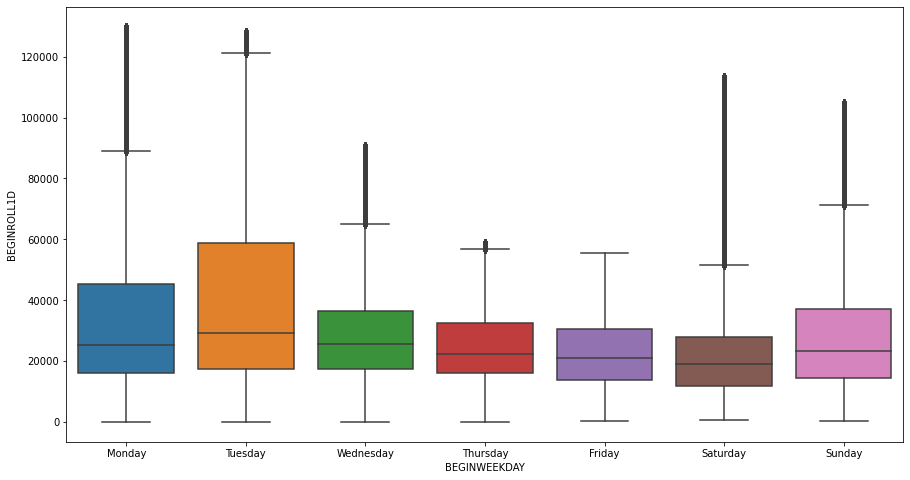

In [28]:
# box plots for jobs started by days of the week (all partitions)
plt.figure(figsize = (15,8))

sns.boxplot(data = jobs,
           x = 'BEGINWEEKDAY',
           y = 'BEGINROLL1D');

In [29]:
# sorting jobs by end and getting counts of jobs ended by day of the week
jobs = jobs.sort_values('END',
                       ascending = False)

jobs['ENDROLL1D'] = (jobs
                       .rolling('1d', on = 'END')['JOBID']
                       .count())

jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,MEMPERUNIT,REQMEMTOT,BEGINWEEKDAY,ENDWEEKDAY,BEGINROLL1D,ENDROLL1D
1491978,32923997,COMPLETED,2021-10-07 20:39:26,2021-10-07 20:41:11,2000,0.09M,2-00:00:00,00:01:45,1,1,sam,0:0,0 days 00:01:45,Mn,2000.0,Thursday,Thursday,1.0,1.0
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000,0.09M,2-00:00:00,00:01:37,1,1,sam,0:0,0 days 00:01:37,Mn,2000.0,Thursday,Thursday,2.0,2.0
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000,393.07M,2-00:00:00,00:01:35,1,1,sam,0:0,0 days 00:01:35,Mn,2000,Thursday,Thursday,3.0,3.0
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000,0.09M,2-00:00:00,00:02:19,1,1,sam,0:0,0 days 00:02:19,Mn,2000,Thursday,Thursday,4.0,4.0
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000,0.09M,2-00:00:00,00:01:55,1,1,sam,0:0,0 days 00:01:55,Mn,2000,Thursday,Thursday,5.0,5.0


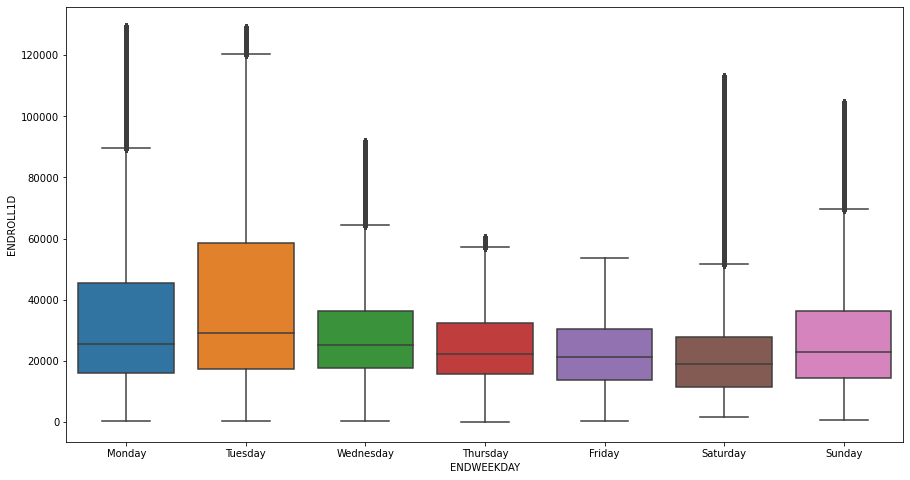

In [30]:
# box plots of the jobs ended by days of the week (all partitions)
plt.figure(figsize = (15,8))

sns.boxplot(data = jobs,
           x = 'ENDWEEKDAY',
           y = 'ENDROLL1D');

In [31]:
jobs['ENDWEEKDAY'].value_counts()

Tuesday      1300031
Wednesday    1182419
Monday       1120898
Thursday     1033677
Friday       1027294
Sunday        882823
Saturday      848092
Name: ENDWEEKDAY, dtype: int64

In [32]:
jobs['BEGINWEEKDAY'].value_counts()

Tuesday      1299110
Wednesday    1177322
Monday       1132506
Friday       1033603
Thursday     1027470
Sunday        875517
Saturday      849706
Name: BEGINWEEKDAY, dtype: int64

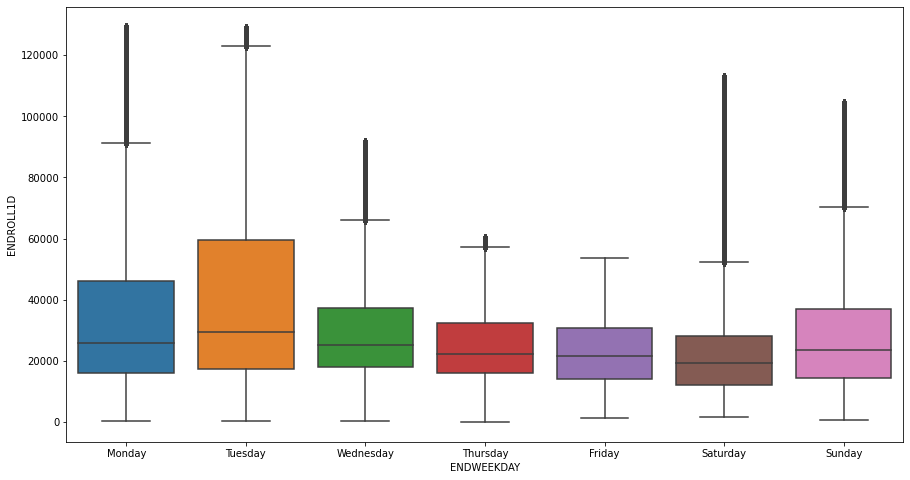

In [34]:
# box plots of jobs ended by days of the week (production partition only)
plt.figure(figsize = (15,8))

sns.boxplot(data = jobs[jobs['PARTITION']== 'production'],
           x = 'ENDWEEKDAY',
           y = 'ENDROLL1D');

In [36]:
jobs[jobs['ENDWEEKDAY'] == 'Tuesday']['JOBLENGTH'].mean()

Timedelta('0 days 03:15:12.413533215')

In [42]:
jobs[jobs['ENDWEEKDAY'] == 'Tuesday']['JOBLENGTH'].median()

Timedelta('0 days 00:10:38')

In [37]:
jobs[jobs['ENDWEEKDAY'] == 'Friday']['JOBLENGTH'].mean()

Timedelta('0 days 03:41:25.878061197')

In [43]:
jobs[jobs['ENDWEEKDAY'] == 'Friday']['JOBLENGTH'].median()

Timedelta('0 days 00:17:24')

In [41]:
jobs['JOBLENGTH'].describe()

count                      7395234
mean     0 days 03:48:03.920357489
std      0 days 12:44:51.141935498
min              -1 days +23:02:54
25%                0 days 00:02:37
50%                0 days 00:13:54
75%                0 days 01:28:10
max               34 days 23:15:05
Name: JOBLENGTH, dtype: object

In [46]:
jobs['PARTITION'].value_counts()

production              7019136
nogpfs                   147044
pascal                   124451
sam                       64967
turing                    21412
maxwell                   11278
cgw-maizie                 4308
debug                      1616
cgw-platypus                376
cgw-dsi-gw                  228
cgw-capra1                  153
cgw-dougherty1              125
cgw-horus                    61
cgw-cqs1                     28
cgw-hanuman                  21
cgw-sideshowbob              14
cgw-vm-qa-flatearth1          9
cgw-tbi01                     7
Name: PARTITION, dtype: int64

In [48]:
logs['COMMAND'].value_counts()

scontrol    6000946
sbatch      1601416
scancel      817933
sacct        621390
squeue       505728
Name: COMMAND, dtype: int64

In [49]:
jobs['STATE'].value_counts()

COMPLETED              7375084
CANCELLED                 9055
FAILED                    3766
CANCELLED by 9201         1776
OUT_OF_MEMORY             1739
                        ...   
CANCELLED by 481000          1
CANCELLED by 590520          1
CANCELLED by 9204            1
CANCELLED by 747109          1
CANCELLED by 315497          1
Name: STATE, Length: 143, dtype: int64

In [51]:
jobs[jobs['JOBLENGTH'] == jobs['JOBLENGTH'].min()]

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,MEMPERUNIT,REQMEMTOT,BEGINWEEKDAY,ENDWEEKDAY,BEGINROLL1D,ENDROLL1D
6257234,25494579,COMPLETED,2020-11-01 01:57:51,2020-11-01 01:00:45,4096,810.62M,12:00:00,00:02:54,1,1,production,0:0,-1 days +23:02:54,Mc,NaN,Sunday,Sunday,7095.0,7572.0
